In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [57]:
# CSV uploaden
df = pd.read_csv("K2_MEN_DATASET.csv", error_bad_lines=False, sep=",")

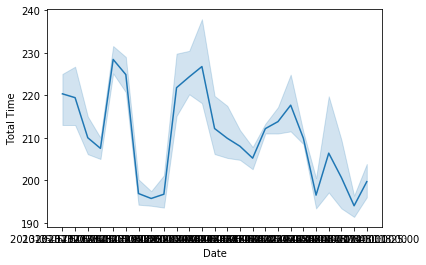

In [71]:
TimesInAFinal = df[(df["Competition Round_HEAT"])]
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="Total Time")

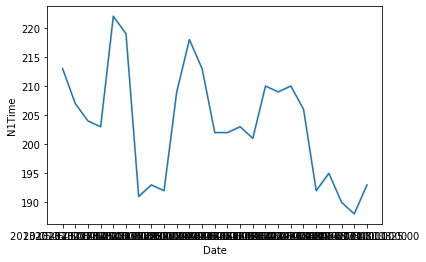

In [72]:
TimesInAFinal = df[(df["Competition Round_HEAT"])]
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="N1Time")

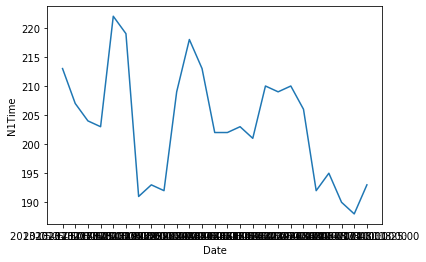

In [60]:
TimesInAFinal = df[(df["Competition Round_HEAT"])].drop_duplicates(["Date"])
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="N1Time")

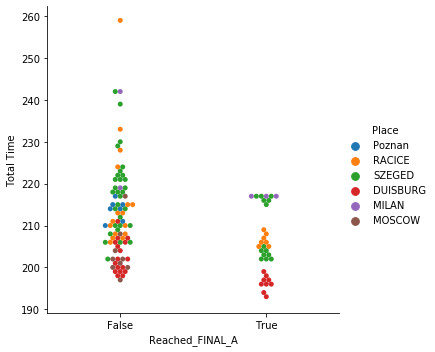

In [32]:
semifinalTimes = df[(df["Competition Round_SEMIFINAL"] == True)]
ax = sns.catplot(data=semifinalTimes,x="Reached_FINAL_A",y = "Total Time",hue="Place",kind="swarm")

/Users/BramSikkens/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/BramSikkens/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


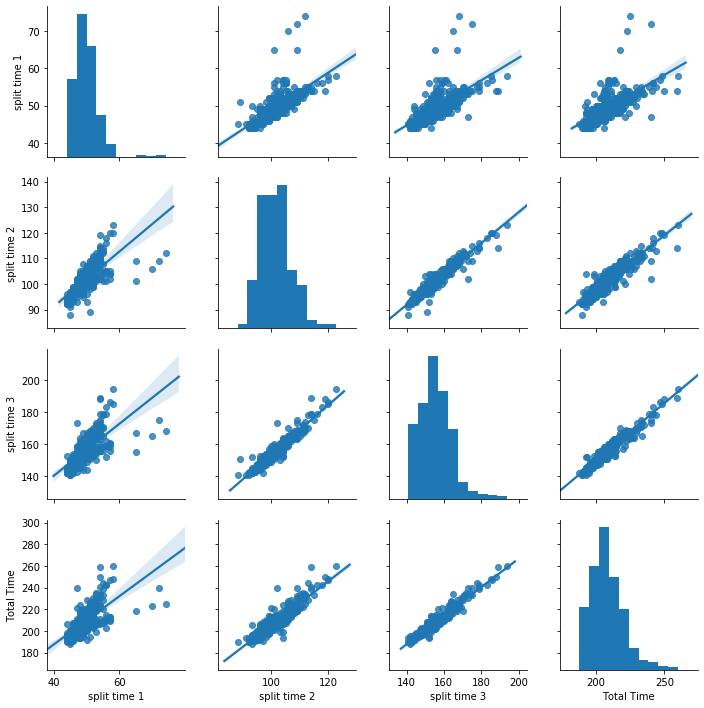

In [17]:
ax = sns.pairplot(data=df,vars=["split time 1", "split time 2", "split time 3", "Total Time"], kind="reg")


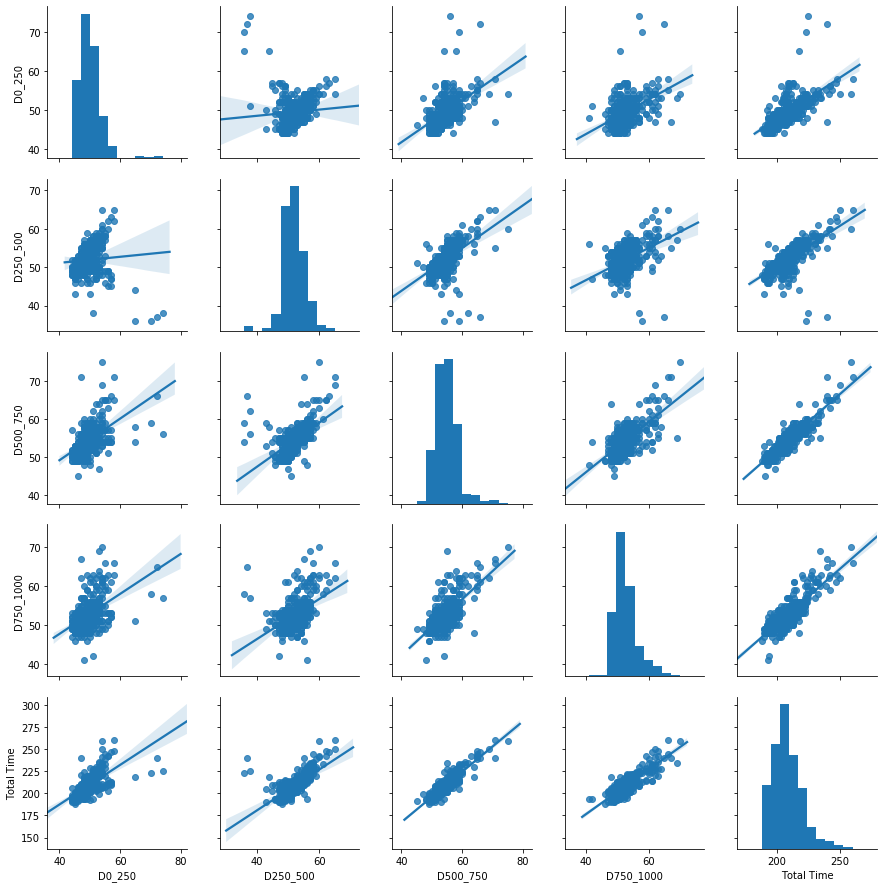

In [18]:
ax = sns.pairplot(data=df,vars=["D0_250", "D250_500", "D500_750","D750_1000","Total Time"], kind="reg")

[(185, 240)]

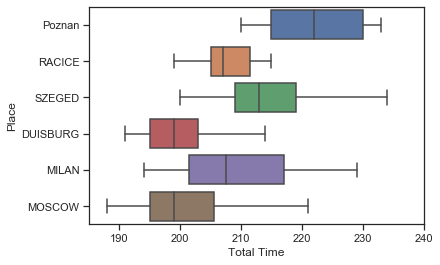

In [104]:
%matplotlib inline
ax = sns.boxplot(x=df["Total Time"],y=df["Place"],showfliers=False)
ax.set(xlim=(185, 240))

[(40, 65)]

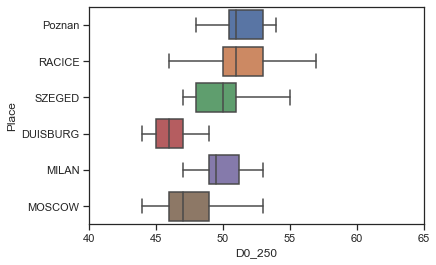

In [112]:
ax = sns.boxplot(x=df["D0_250"],y=df["Place"],showfliers=False)
ax.set(xlim=(40, 65))


[(40, 65)]

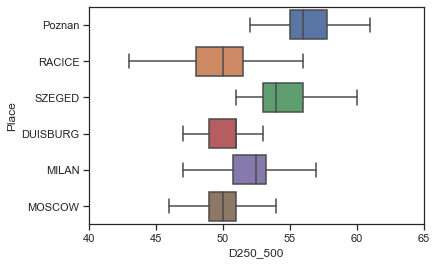

In [111]:
bx = sns.boxplot(x=df["D250_500"],y=df["Place"],showfliers=False)
bx.set(xlim=(40, 65))

[(40, 65)]

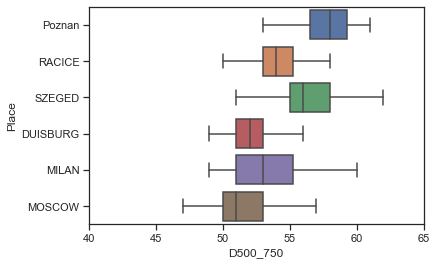

In [113]:
cx = sns.boxplot(x=df["D500_750"],y=df["Place"],showfliers=False)
cx.set(xlim=(40, 65))

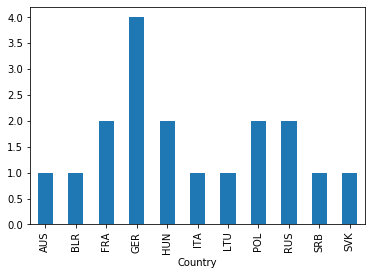

In [83]:
CountriesInAFinal = df[(df["Competition Round_FINAL A"] == True) & (df["Final Rank"] <4)]
groupedCountries = CountriesInAFinal.groupby("Country").size()
groupedCountries.plot.bar()

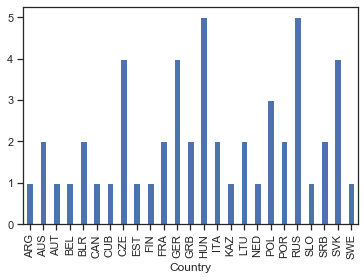

In [84]:
CountriesInAFinal = df[(df["Competition Round_FINAL A"] == True)]
groupedCountries = CountriesInAFinal.groupby("Country").size()
groupedCountries.plot.bar()

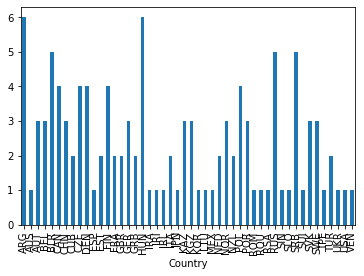

In [78]:
CountriesInBFinal = df[(df["Competition Round_SEMIFINAL"] == True)]
groupedCountries = CountriesInBFinal.groupby("Country").size()
groupedCountries.plot.bar()

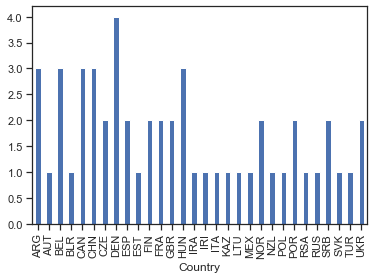

In [85]:
CountriesInBFinal = df[(df["Competition Round_FINAL B"] == True)]
groupedCountries = CountriesInBFinal.groupby("Country").size()
groupedCountries.plot.bar()

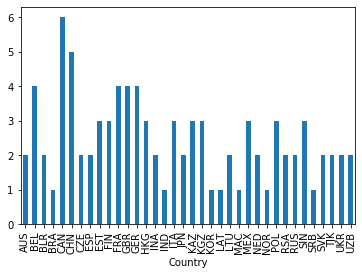

In [74]:
StrandedCountries = df[(df["Competition Round_FINAL C"] == False) & (df["Competition Round_SEMIFINAL"] == False)& (df["Competition Round_FINAL B"] == False) & (df["Competition Round_FINAL A"] == False) & (df["Reached_FINAL_A"]  == False ) & (df["Reached_SEMI"]  == False )]
groupedCountries = StrandedCountries.groupby("Country").size()
groupedCountries.plot.bar()

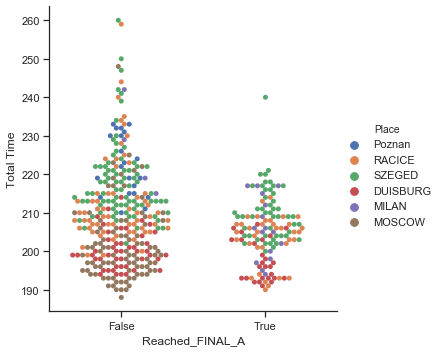

In [118]:
sns.catplot(x="Reached_FINAL_A", y="Total Time", hue="Place" ,kind="swarm", data=df)

In [124]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="K2_pandas_profiling.html")

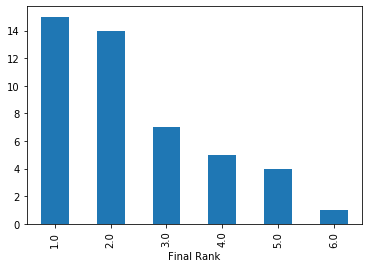

In [7]:
data = df[(df["Competition Round_HEAT"] == True) & df["Reached_FINAL_A"] == True]
groups = data.groupby("Final Rank").size()
groups.plot.bar()

In [78]:
onlyTop3 = df[(df["Final Rank"] < 4)]
groups = onlyTop3.groupby("Date")["Total Time"].mean().to_frame(name="Top3Avg").reset_index()
print(groups)
merge = pd.merge(df,groups,on="Date",how="outer",)
print(merge.head(50))

Date     Top3Avg
0   2013-05-17 10:58:00         NaN
1   2013-05-17 11:05:00  210.000000
2   2013-05-17 11:12:00  204.500000
3   2013-05-17 11:19:00  204.000000
4   2013-05-17 15:34:00  206.000000
5   2013-05-18 09:54:00  200.000000
6   2013-05-18 11:09:00  191.000000
7   2013-05-31 10:22:00  223.666667
8   2013-05-31 10:29:00  219.000000
9   2013-05-31 14:58:00  210.500000
10  2013-08-29 10:22:00  192.500000
11  2013-08-29 10:29:00  193.666667
12  2013-08-29 10:43:00  193.000000
13  2013-08-29 17:10:00  194.333333
14  2013-08-29 17:17:00  197.000000
15  2013-08-29 17:24:00  197.333333
16  2013-08-31 12:16:00  198.666667
17  2013-08-31 15:46:00  202.666667
18  2013-10-05 10:41:00  212.000000
19  2013-10-05 10:48:00  219.333333
20  2013-10-05 10:55:00  216.000000
21  2013-10-05 15:24:00  216.333333
22  2013-10-05 15:31:00  216.333333
23  2013-11-05 10:01:00  208.000000
24  2013-11-05 11:12:00  201.000000
25  2014-02-05 10:50:00  204.666667
26  2014-02-05 15:23:00  217.000000
27  2014-03